In [81]:
import os

path = "/content/drive/MyDrive/Colab Notebooks/google_colab"

In [82]:
import pickle

with open(os.path.join(path, "Clean/topics.pkl"), 'rb') as rb:
   topics = pickle.load(rb)
topics

['Doi song',
 'Chinh tri Xa hoi',
 'Khoa hoc',
 'Suc khoe',
 'Phap luat',
 'Vi tinh',
 'Kinh doanh',
 'The thao',
 'The gioi',
 'Van hoa']

In [83]:
import pandas as pd
df = pd.read_pickle(os.path.join(path, "Clean/vi_df.pkl"))
df

,News,Topics
0,để trẻ_em phát_triển không bị lệch_lạc về giới...,0
1,sò_huyết ô loan đầm ô loan thuộc huyện tuy an ...,0
2,anh phan đã làm uổng công độc_giả em nghĩ rằng...,0
3,tôi có nên tiếp_tục tình_yêu với anh anh muốn ...,0
4,bình giữ nhiệt nóng lạnh với hai tính_năng vừa...,0
...,...,...
95,thu hà tôi không quan_tâm đến những lời đồn_th...,9
96,wet wet wet tái_hợp sau năm mỗi người mỗi ngả ...,9
97,khánh linh tôi giống như ngọn lửa nhỏ cháy mãi...,9
98,tiếng hát bên sông hàn bản tình_ca về gia_đình...,9


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.News, df.Topics, stratify=df.Topics)

In [85]:
with open(os.path.join(path, "Analyze/stop_words.pkl"), 'rb') as rb:
   stop_words = pickle.load(rb)

In [86]:
X_train.shape

(750,)

In [87]:
y_train.shape

(750,)

In [88]:
len(stop_words)

2567

In [89]:
import pickle

In [90]:
from sklearn.neighbors import KNeighborsClassifier

def knn(X): 
  model = KNeighborsClassifier(n_neighbors=15)
  model.fit(X.toarray(), y_train)

  with open(os.path.join(path,"Model/knn.pkl"), "wb") as file:
    pickle.dump(model, file)

  return model

In [91]:
from sklearn.naive_bayes import GaussianNB

def bayes_model(X):
  model = GaussianNB()
  model.fit(X.toarray(), y_train)

  with open(os.path.join(path,"Model/bayes.pkl"), "wb") as file:
    pickle.dump(model, file)

  return model


In [92]:
from sklearn.svm import SVC

def svc_model(X):
  model = SVC() # mặc định ok
  model.fit(X.toarray(), y_train)

  with open(os.path.join(path,"Model/svm.pkl"), "wb") as file:
    pickle.dump(model, file)

  return model

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words = stop_words)
X = tv.fit_transform(X_train)

In [94]:
with open(os.path.join(path,"Model/tv.pkl"), "wb") as file:
  pickle.dump(tv, file)

In [95]:
tv_bayes = bayes_model(X)

In [96]:
tv_knn = knn(X)

In [97]:
tv_scv =  svc_model(X)

In [98]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn

def print_report(model):
  print(model)
  y_predicted = model.predict(tv.transform(X_test).toarray())

  cm = confusion_matrix(y_test, y_predicted)
  print(cm)

  sn.heatmap(cm, annot=True, fmt="d")
  plt.xlabel("Predicted")
  plt.ylabel("Truth")
  plt.show()

  print(classification_report(y_test, y_predicted))

KNeighborsClassifier(n_neighbors=15)
[[23  1  0  0  0  0  1  0  0  0]
 [ 1 18  0  1  2  1  0  0  1  1]
 [ 2  1 10  6  0  3  0  0  1  2]
 [ 0  0  2 22  0  0  1  0  0  0]
 [ 0  0  1  0 24  0  0  0  0  0]
 [ 0  1  0  0  0 22  0  0  0  2]
 [ 0  0  0  0  0  1 23  0  1  0]
 [ 0  0  0  0  0  0  0 25  0  0]
 [ 0  0  1  2  1  0  2  0 19  0]
 [ 1  1  1  0  0  0  0  0  1 21]]


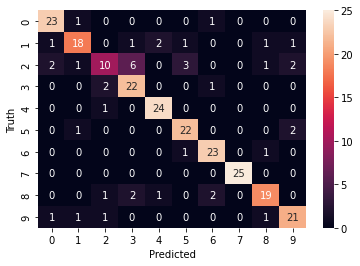

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.82      0.72      0.77        25
           2       0.67      0.40      0.50        25
           3       0.71      0.88      0.79        25
           4       0.89      0.96      0.92        25
           5       0.81      0.88      0.85        25
           6       0.85      0.92      0.88        25
           7       1.00      1.00      1.00        25
           8       0.83      0.76      0.79        25
           9       0.81      0.84      0.82        25

    accuracy                           0.83       250
   macro avg       0.82      0.83      0.82       250
weighted avg       0.82      0.83      0.82       250

GaussianNB()
[[13  4  0  1  0  0  1  0  0  6]
 [ 1 17  0  0  3  0  1  1  1  1]
 [ 2  1 13  6  0  0  1  0  0  2]
 [ 1  2  3 15  0  0  0  0  1  3]
 [ 2  3  0  0 15  1  1  0  1  2]
 [ 0  0  0  1  0 21  2  1  0  0]
 [ 0  0  0  0  2  2 18  0  3  

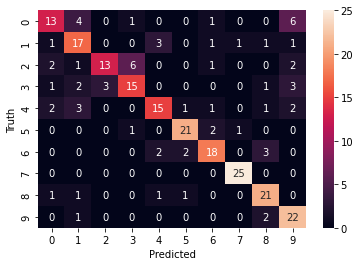

              precision    recall  f1-score   support

           0       0.65      0.52      0.58        25
           1       0.59      0.68      0.63        25
           2       0.81      0.52      0.63        25
           3       0.65      0.60      0.63        25
           4       0.71      0.60      0.65        25
           5       0.84      0.84      0.84        25
           6       0.75      0.72      0.73        25
           7       0.93      1.00      0.96        25
           8       0.72      0.84      0.78        25
           9       0.61      0.88      0.72        25

    accuracy                           0.72       250
   macro avg       0.73      0.72      0.72       250
weighted avg       0.73      0.72      0.72       250

SVC()
[[22  1  1  0  0  0  1  0  0  0]
 [ 1 19  1  1  0  0  1  0  1  1]
 [ 0  1 21  1  0  1  0  0  0  1]
 [ 0  0  6 19  0  0  0  0  0  0]
 [ 0  2  1  0 21  0  1  0  0  0]
 [ 1  0  1  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  1 22  0  2  0]
 [ 0

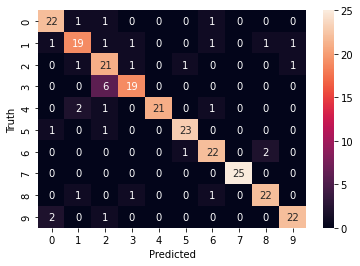

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.79      0.76      0.78        25
           2       0.66      0.84      0.74        25
           3       0.86      0.76      0.81        25
           4       1.00      0.84      0.91        25
           5       0.92      0.92      0.92        25
           6       0.85      0.88      0.86        25
           7       1.00      1.00      1.00        25
           8       0.88      0.88      0.88        25
           9       0.92      0.88      0.90        25

    accuracy                           0.86       250
   macro avg       0.87      0.86      0.87       250
weighted avg       0.87      0.86      0.87       250



In [99]:
print_report(tv_knn)
print_report(tv_bayes) 
print_report(tv_scv)

In [100]:
topics

['Doi song',
 'Chinh tri Xa hoi',
 'Khoa hoc',
 'Suc khoe',
 'Phap luat',
 'Vi tinh',
 'Kinh doanh',
 'The thao',
 'The gioi',
 'Van hoa']